# K-Means

K-Means is a type of **Unsupervised learning**. This algorithm is used when we don't have labeled data. Then goal of this algorithm is to find groups (clusters) in the given data.

## Algorithm

**Step 1** We randomly pick K cluster centers (centroids). Let's assume these are $C_{1}, C_{2}, ..., C_{k}$.

**Step 2** We assign each input value to the closest center. This is done by calculating Euclidean distance between the point and each centroid.

**Step 3** We find the new centroid by taking the average of all the points assigned to that cluster.

**Step 4** We repeat step 2 and 3 until none of the cluster assignments change. That means until our clusters remain stable, we repeat the algorithm.

 

![title](images/workflows-kmeans-diagram.jpg)

## Implementation

We will use a dataset with 3000 entries and 3 clusters (we know the value of K).

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy

plt.Figure.figsize = (16, 9)

### Preparing data

In [2]:
data = pd.read_csv('data/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
# Normalizing imporves the K-means performance
from sklearn import preprocessing

data_normalized = preprocessing.normalize(data, norm='l1', axis=0)
d1 = data_normalized.transpose()[0]
d2 = data_normalized.transpose()[1]
D = np.array(list(zip(d1,d2)))

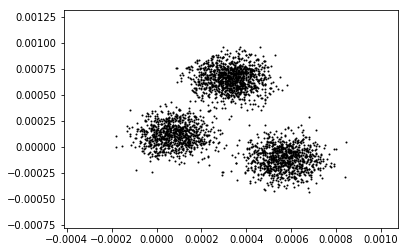

In [5]:
plt.axis('auto')
plt.scatter(d1, d2, c='black', s=1)

In [6]:
# STEP 1
# Number of clusters
K = 3 
# X coordinates of random centroids
C_x = np.random.uniform(np.min(D), np.max(D), size=K)
# Y coordinates of random centroids
C_y = np.random.uniform(np.min(D), np.max(D), size=K)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C

array([[  2.31877493e-04,  -3.63201776e-04],
       [ -4.05196886e-04,  -3.75472067e-04],
       [  4.34413465e-04,   5.09163292e-05]], dtype=float32)

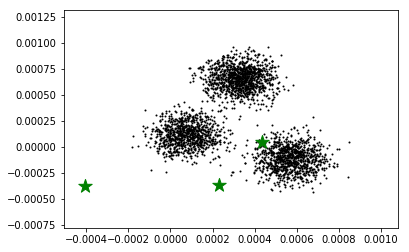

In [7]:
plt.axis('auto')
plt.scatter(d1, d2, c='black', s=1)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [8]:
def distance(a, b, type='Euclidean', ax=1):
    if type == 'Euclidean':
        return np.linalg.norm(a - b, axis=ax)

In [9]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
#Cluster labels
clusters = np.zeros(len(D))
# Error function: distance between new centroids and old centroids
error = distance(C, C_old, type='Euclidean', ax=None)
# Loop will run until the error becomes zero 
while error != 0:
    # STEP 2 Assigning each value to its closest cluster
    for i in range(len(D)):
        distances = distance(D[i], C, type='Euclidean')
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # STEP 3 Finding the new centroids by taking the average value
    for i in range(K):
        points = [D[j] for j in range(len(D)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    #STEP 4 Repeat the loop until the error function converges
    error = distance(C, C_old, type='Euclidean', ax=None)
    print('error: ', error)       

error:  0.000556928
error:  0.000397851
error:  0.000144061
error:  9.13355e-06
error:  0.0


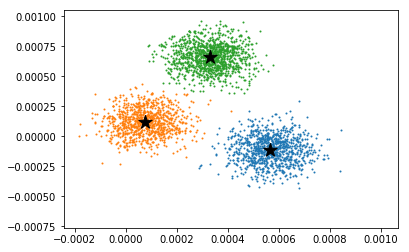

In [10]:
for i in range(K):
        points = np.array([D[j] for j in range(len(D)) if clusters[j] == i])
        plt.axis('auto')
        plt.scatter(points[:, 0], points[:, 1], s=1)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')

### Resources
https://mubaris.com/2017/10/01/kmeans-clustering-in-python/
http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html